In [1]:
# 4)
# b) Diferença salarial entre homens e mulheres admitidos;

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import seaborn as sb

In [3]:
sb.set(style="whitegrid")

In [4]:
#lista de todos os arquivos
caged_files = sorted(glob('..\DadosCaged\CAGEDMOV*.txt'))
main_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [5]:
#Lista todos os arquivos carregados e concatenados no dataframe pandemia_df
caged_files

['..\\DadosCaged\\CAGEDMOV202001.txt',
 '..\\DadosCaged\\CAGEDMOV202002.txt',
 '..\\DadosCaged\\CAGEDMOV202003.txt',
 '..\\DadosCaged\\CAGEDMOV202004.txt',
 '..\\DadosCaged\\CAGEDMOV202005.txt',
 '..\\DadosCaged\\CAGEDMOV202006.txt',
 '..\\DadosCaged\\CAGEDMOV202007.txt',
 '..\\DadosCaged\\CAGEDMOV202008.txt',
 '..\\DadosCaged\\CAGEDMOV202009.txt',
 '..\\DadosCaged\\CAGEDMOV202010.txt',
 '..\\DadosCaged\\CAGEDMOV202011.txt',
 '..\\DadosCaged\\CAGEDMOV202012.txt',
 '..\\DadosCaged\\CAGEDMOV202101.txt',
 '..\\DadosCaged\\CAGEDMOV202102.txt',
 '..\\DadosCaged\\CAGEDMOV202103.txt']

In [6]:
#Lista as colunas do dataframe
main_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [7]:
#Alteração dos valores numéricos para valores legíveis.
sex = {1: 'Homem',3 :'Mulher', 9: 'Nao Identificado'}
saldomovimentacao = {1: 'admissao', -1: 'demissao'}

In [8]:
#Aplicação dos dics criados para deixar os dados mais legíveis
main_df['sexo'] = main_df['sexo'].apply(lambda x: sex[x])
main_df['saldomovimentação'] = main_df['saldomovimentação'].apply(lambda x: saldomovimentacao[x])

In [9]:
admissoes = main_df['saldomovimentação'] == "admissao"
admissoes_df = main_df[admissoes]

In [10]:
#Exibição dos ultimos 5 registros do dataframe cotendo somente admissões
admissoes_df.tail()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
39694373,202103,5,50,500570,H,4930202,admissao,783225,101,7,...,0,1,20,0,0,0,1200.000000,2,0,1
39694379,202103,2,24,241120,G,4772500,admissao,421125,101,7,...,0,1,20,0,0,0,1100.000000,2,0,1
39694381,202103,4,43,430510,N,7810800,admissao,725205,106,7,...,0,1,20,0,0,0,1515.800049,8,0,1
39694383,202103,3,35,355030,A,151201,admissao,724315,102,7,...,2,3,10,0,0,0,1500.000000,99,0,1
39694384,202103,3,35,355030,I,5620101,admissao,513205,111,7,...,0,1,20,0,1,0,6567.000000,7,0,1


In [11]:
#Quantidade de registros sem o filtro de admissão
main_df['sexo'].value_counts()

Homem     24430359
Mulher    15264029
Name: sexo, dtype: int64

In [12]:
#Quantidade de registros com o filtro de admissão
admissoes_df['sexo'].value_counts()

Homem     12562967
Mulher     7746656
Name: sexo, dtype: int64

In [13]:
homens= admissoes_df['sexo'] == "Homem"
homens_admitidos_df = admissoes_df[homens]

mulheres= admissoes_df['sexo'] == "Mulher"
mulheres_admitidas_df = admissoes_df[mulheres]

In [14]:
quantidade_mulheres = mulheres_admitidas_df['sexo'].value_counts()

In [15]:
quantidade_homens = homens_admitidos_df['sexo'].value_counts()

In [16]:
#Total do salário de cada gênero:
salario_homens_admt = homens_admitidos_df['salário'].sum().round(2)
salario_mulheres_admt = mulheres_admitidas_df['salário'].sum().round(2)

In [19]:
print('Salário total (homens): ', salario_homens_admt)

Salário total (homens):  442212060068.8


In [21]:
print('Salário total (mulheres): ', salario_mulheres_admt)

Salário total (mulheres):  24173650632.27


In [22]:
media_sal_homem = salario_homens_admt / quantidade_homens[0]
media_sal_homem = round(media_sal_homem, 2)

In [23]:
media_sal_mulher = salario_mulheres_admt / quantidade_mulheres[0]
media_sal_mulher = round(media_sal_mulher, 2)

In [25]:
#Diferença salarial entre homens e mulheres:
print('Média salarial (Homem): R$', media_sal_homem)
print('Média salarial (Mulher): R$', media_sal_mulher)
print('Diferença salarial: R$', round((media_sal_homem - media_sal_mulher), 2))

Média salarial (Homem): R$ 35199.65
Média salarial (Mulher): R$ 3120.53
Diferença salarial: R$ 32079.12


In [26]:
dif_salarial_df = {'Média Salarial':  [media_sal_mulher, media_sal_homem],
                   'Gênero': ['Mulher', 'Homem'],
        'Diferença Salarial': [round((media_sal_mulher - media_sal_homem), 2), round((media_sal_homem - media_sal_mulher), 2)]}

dif_salarial_df = pd.DataFrame (dif_salarial_df, columns = ['Média Salarial','Gênero','Diferença Salarial'])

dif_salarial_df

,Média Salarial,Gênero,Diferença Salarial
0,3120.53,Mulher,-32079.12
1,35199.65,Homem,32079.12


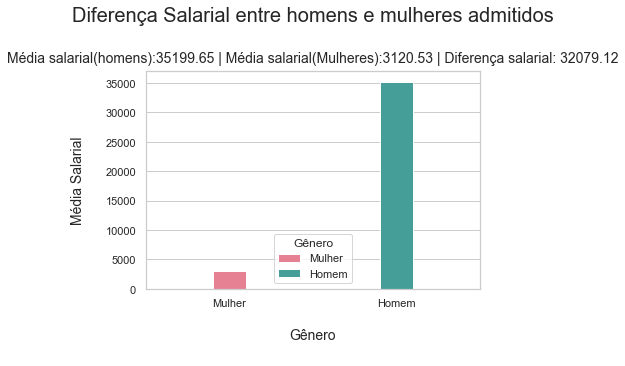

In [28]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sb.barplot(x=dif_salarial_df['Gênero'], 
                y=dif_salarial_df['Média Salarial'], 
                data=dif_salarial_df, 
                dodge=False, 
                palette='husl',
                hue=dif_salarial_df['Gênero'])
ax.set_title("Diferença Salarial entre homens e mulheres admitidos\n\n", fontsize = 20)
ax.text(x=0.5,
        y=1.03,
        s='Média salarial(homens):' +
            str(media_sal_homem) +
            ' | Média salarial(Mulheres):' +
            str(media_sal_mulher) +
            ' | Diferença salarial: ' +
            str(round((media_sal_homem - media_sal_mulher), 2)),
        fontsize=14,
        ha='center',
        va='bottom',
        transform=ax.transAxes)
ax.set_xlabel("\nGênero\n", fontsize = 14)
ax.set_ylabel("\nMédia Salarial\n", fontsize = 14)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .20)